In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

### Project dataset:

[Multiple Sclerosis Dataset](https://www.kaggle.com/datasets/desalegngeb/conversion-predictors-of-cis-to-multiple-sclerosis/data)

### Dataset columns descriptions

1. **ID**: Patient identifier (int)
2. **Age**: Patient Age in years (int)
3. **Schooling**: time the patient spent in school in years (int)
4. **Gender**: 1=male, 2=female
5. **Breastfeeding**: 1=yes, 2=no, 3=unknown 
6. **Varicella**: 1=positive, 2=negative, 3=unknown
7. **Initial_Symptoms**: 1=visual, 2=sensory, 3=motor, 4=other, 5= visual and sensory, 6=visual and motor, 7=visual and others, 8=sensory and motor, 9=sensory and other, 10=motor and other, 11=Visual, sensory and motor, 12=visual, sensory and other, 13=Visual, motor and other, 14=Sensory, motor and other, 15=visual,sensory,motor and other
8. **Mono _or_Polysymptomatic**: 1=monosymptomatic, 2=polysymptomatic, 3=unknown
9. **Oligoclonal_Bands**: 0=negative, 1=positive, 2=unknown
10. **Lower-Limb Somatosensory Evoked Potentials (LLSSEP)**: 0=negative, 1=positive
11. **Upper-Limb Somatosensory Evoked Potentials (ULSEP)**:0=negative, 1=positive
12. **Visual Evoked Potentials (VEP)**:0=negative, 1=positive
13. **Brainstem Auditory Evoked Potentials (BAEP)**: 0=negative, 1=positive
14. **Periventricular_MRI**:0=negative, 1=positive
15. **Cortical_MRI**: 0=negative, 1=positive
16. **Infratentorial_MRI**:0=negative, 1=positive
17. **Spinal_Cord_MRI**: 0=negative, 1=positive
18. **Initial_EDSS**: Initial Expanded Disability Status 
19. **Final_EDSS**: Final Expanded Disability Status 
20. **Group**: 1=CDMS, 2=non-CDMS

#### Important Definitions

**Varicella**: Chicken box. A highly contagious disease caused by the initial infection with varicella zoster virus (VZV), a member of the herpesvirus family.

**Brainstem Auditory Evoked Potentials**: very small auditory evoked potentials in response to an auditory stimulus, which are recorded by electrodes placed on the scalp.

**Visual Evoked Potentials**: an evoked potential elicited by presenting light flash or pattern stimulus which can be used to confirm damage to visual pathway including retina, optic nerve, optic chiasm, optic radiations, and occipital cortex.

**Oligoclonal bands**: bands of immunoglobulins that are seen when a patient's blood serum, or cerebrospinal fluid (CSF) is analyzed. They are used in the diagnosis of various neurological and blood diseases. 

**Somatosensory evoked potentials (SSEP)**: Somatosensory evoked potentials (SSEP) are recorded from the central nervous system following stimulation of peripheral nerves. 

**Expanded Disability Status Scale (EDSS)**: a method of quantifying disability in multiple sclerosis and monitoring changes in the level of disability over time.

In [10]:
ms_df = pd.read_csv(
    "data\conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")
ms_df.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [11]:
ms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               273 non-null    int64  
 1   Gender                   273 non-null    int64  
 2   Age                      273 non-null    int64  
 3   Schooling                272 non-null    float64
 4   Breastfeeding            273 non-null    int64  
 5   Varicella                273 non-null    int64  
 6   Initial_Symptom          272 non-null    float64
 7   Mono_or_Polysymptomatic  273 non-null    int64  
 8   Oligoclonal_Bands        273 non-null    int64  
 9   LLSSEP                   273 non-null    int64  
 10  ULSSEP                   273 non-null    int64  
 11  VEP                      273 non-null    int64  
 12  BAEP                     273 non-null    int64  
 13  Periventricular_MRI      273 non-null    int64  
 14  Cortical_MRI             2

In [12]:
ms_df.describe()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
count,273.000000,273.000000,273.000000,272.000000,273.000000,273.000000,272.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,125.000000,125.00000,273.000000
mean,136.000000,1.615385,34.062271,15.176471,1.831502,1.710623,6.430147,1.725275,0.358974,0.424908,0.369963,0.307692,0.065934,0.505495,0.432234,0.293040,0.315018,1.360000,1.44800,1.542125
std,78.952517,0.487398,11.114369,4.244175,0.874998,0.732991,4.222009,0.494066,0.558426,0.495237,0.483681,0.462386,0.248623,0.500888,0.496296,0.455993,0.465376,0.587504,0.65323,0.499137
min,0.000000,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,68.000000,1.000000,25.000000,12.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
50%,136.000000,2.000000,33.000000,15.000000,2.000000,2.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,2.000000
75%,204.000000,2.000000,40.000000,20.000000,3.000000,2.000000,9.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.00000,2.000000
max,272.000000,2.000000,77.000000,25.000000,3.000000,3.000000,15.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.00000,2.000000


In [13]:
ms_df.isna().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [14]:
ms_df.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
num_data = len(ms_df)

missing_value = round(ms_df.isna().sum() / num_data * 100,2)

missing_df = pd.DataFrame(missing_value[missing_value.values > 0],
            columns = ['missing percent'])

missing_df

,missing percent
Schooling,0.37
Initial_Symptom,0.37
Initial_EDSS,54.21
Final_EDSS,54.21


In [16]:
num_cols = ['Age','Schooling']

obj_cols = ['Gender','Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS',
       'Final_EDSS']

Text(0.5, 0.98, 'Numeric Column')

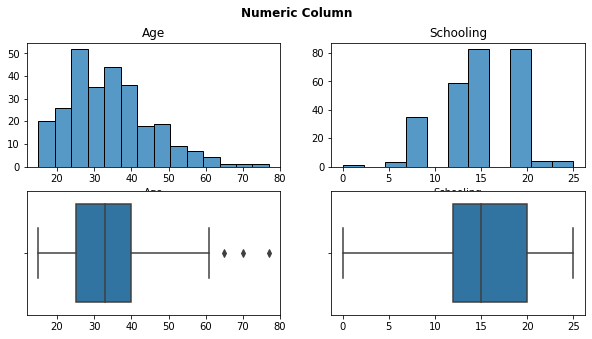

In [17]:
# Numeric Columns EDA
fig,ax = plt.subplots(ncols = 2, nrows = 2, figsize = (10,5))

ax = ax.flatten()

hist_idx = 0
box_idx = 2

for col in num_cols:
    
    sns.histplot(data = ms_df,
                x = col,
                ax = ax[hist_idx])
    sns.boxplot(data = ms_df,
                x = col,
               ax = ax[box_idx])
    
    ax[hist_idx].set_ylabel('')
    ax[box_idx].set_xlabel('')
    
    hist_idx += 1
    box_idx += 1
    
ax[0].set_title('Age')
ax[1].set_title('Schooling')
    
fig.suptitle('Numeric Column',weight = 'bold')

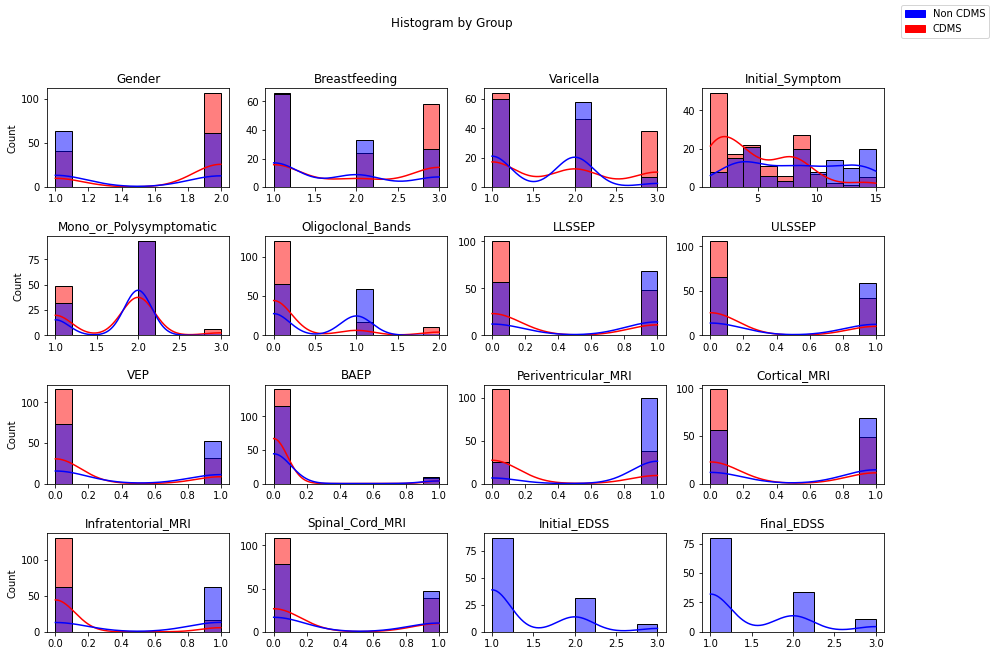

In [18]:
# Objective Columns EDA
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15, 10))
ax = ax.flatten()

fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(obj_cols):
    sns.histplot(data=ms_df, x=col, 
                 alpha=0.5,
                 hue= 'group', 
                 hue_order = [1,2],
                 palette=['blue', 'red'],
                 kde = True,
                 ax=ax[i], legend=None)
    
    if i % 4 != 0:
        ax[i].set_ylabel('')
    ax[i].set_title(col)
    ax[i].set_xlabel('')

blue_patch = plt.Rectangle((0, 0), 1, 1, color='blue', label='Non CDMS')
red_patch = plt.Rectangle((0, 0), 1, 1, color='red', label='CDMS')

fig.suptitle('Histogram by Group')
fig.legend(handles=[blue_patch, red_patch], loc='upper right')

In [19]:
ms_df.isnull().sum() / len(ms_df) * 100

Gender                      0.000000
Age                         0.000000
Schooling                   0.366300
Breastfeeding               0.000000
Varicella                   0.000000
Initial_Symptom             0.366300
Mono_or_Polysymptomatic     0.000000
Oligoclonal_Bands           0.000000
LLSSEP                      0.000000
ULSSEP                      0.000000
VEP                         0.000000
BAEP                        0.000000
Periventricular_MRI         0.000000
Cortical_MRI                0.000000
Infratentorial_MRI          0.000000
Spinal_Cord_MRI             0.000000
Initial_EDSS               54.212454
Final_EDSS                 54.212454
group                       0.000000
dtype: float64

- As the percentage of nulls in initial and final EDSS exceeds 50%, they will be removed and won't be used in the analysis.

- For the null values in Initial Symptom, experimentation with two data imputation techniques (knn imputation, constant/zero imputing) will be done.

- For the null values in Schooling, experimentation with two data imputation techniques (knn imputation, mean imputing, and median imputing) will be done.
 


In [20]:
ms_df.drop(['Initial_EDSS','Final_EDSS'],axis=1,inplace=True)

In [21]:
imputer = SimpleImputer(strategy='most_frequent')
ms_df_imputed = pd.DataFrame(imputer.fit_transform(ms_df),columns = ms_df.columns)

In [22]:
ms_df_imputed.head()

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1.0,34.0,20.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,1.0,61.0,25.0,3.0,2.0,10.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,22.0,20.0,3.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2.0,41.0,15.0,1.0,1.0,7.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,2.0,34.0,20.0,2.0,1.0,6.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [23]:
def count_plot(data, feature, title, hue=True): 
    plt.figure(figsize=(8, 10),facecolor='#F6F5F4')
    total = float(len(data))
    if hue:
        ax = sns.countplot(x=data[feature], hue=data['group'], palette='coolwarm')
        
    else:
        ax = sns.countplot(x=data[feature], hue=None, palette='coolwarm')
    
    ax.set_facecolor('#F6F5F4')

    for p in ax.patches:

        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

    ax.set_title(title, fontsize=16, y=1.05)
    sns.despine(right=True)
    sns.despine(offset=5, trim=True)

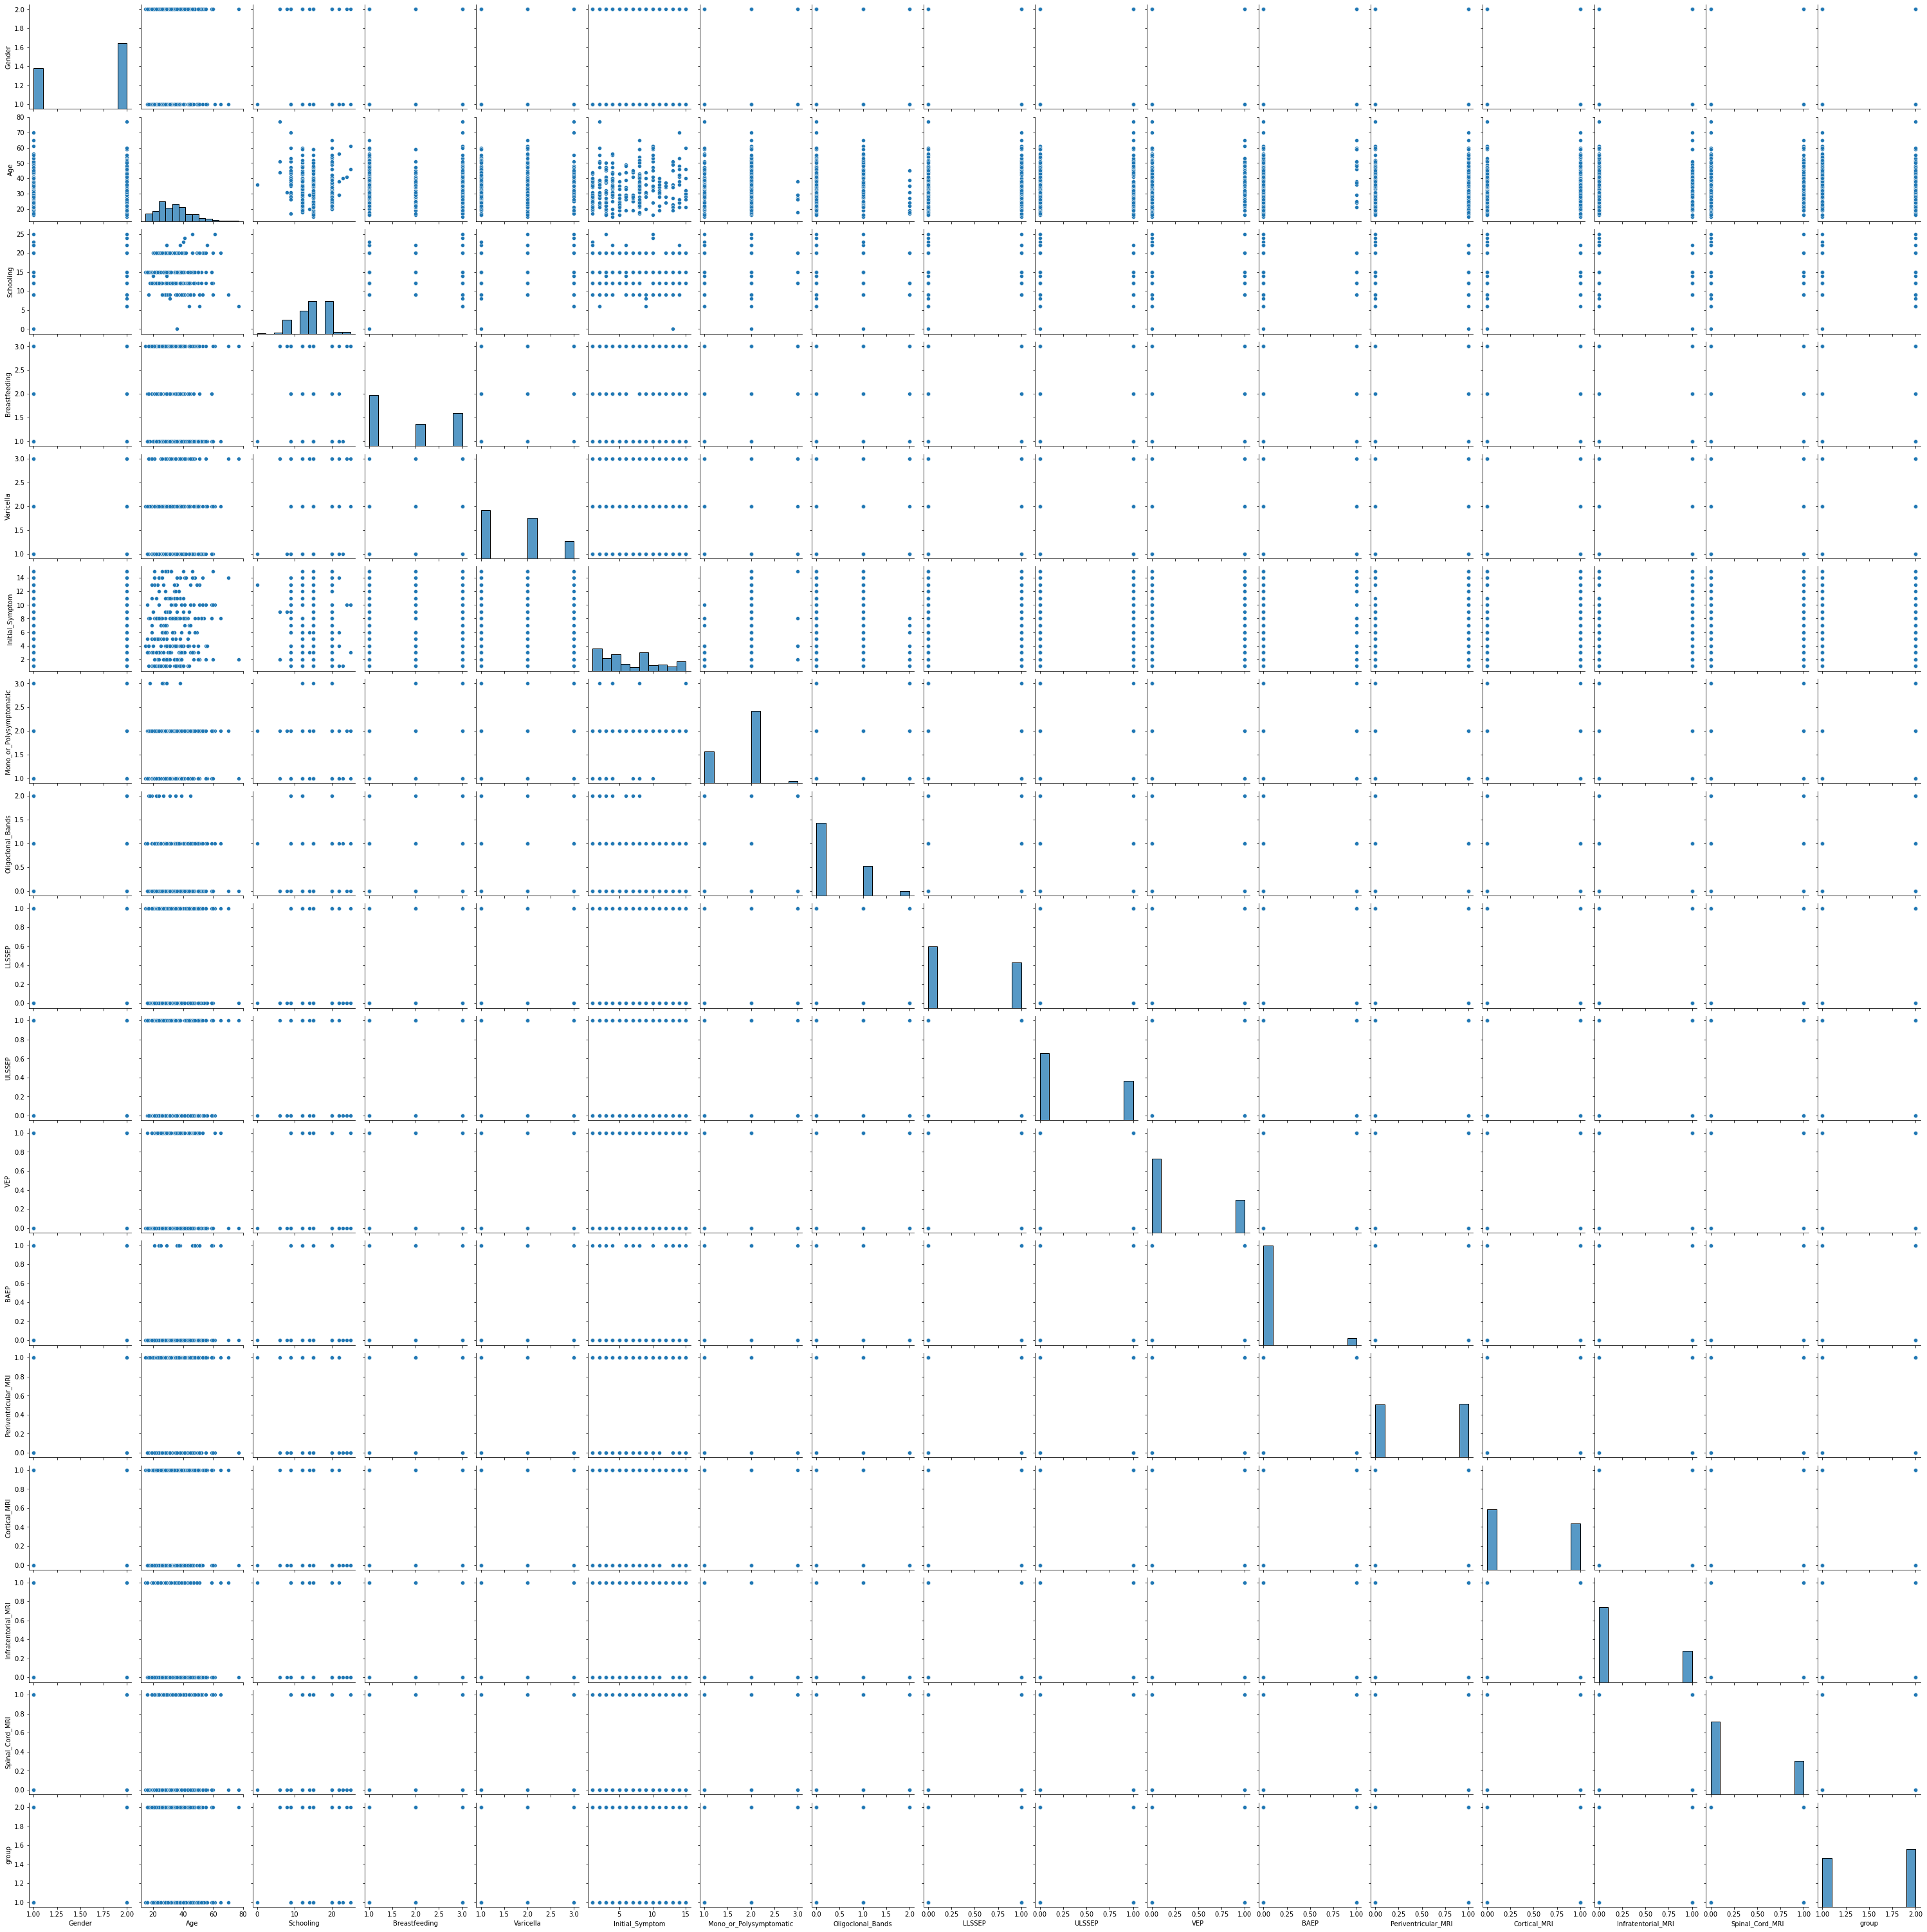

In [24]:
sns.pairplot(ms_df)

#### Analyzing Numerical Data

In [25]:
numerical_cols = ms_df.columns[:2]
numerical_cols

Index(['Gender', 'Age'], dtype='object')

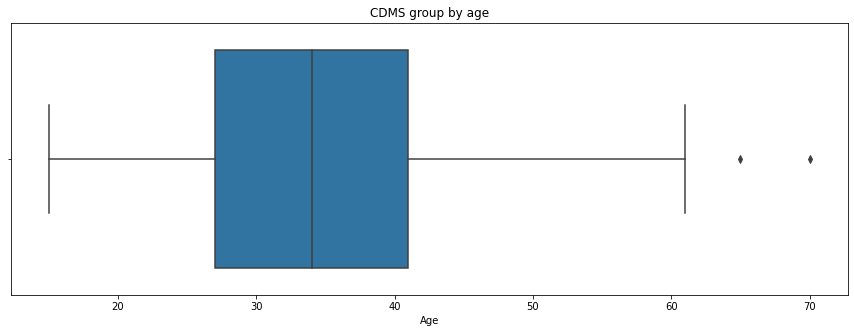

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Age',data = ms_df[ms_df['group']==1]);
plt.title('CDMS group by age');

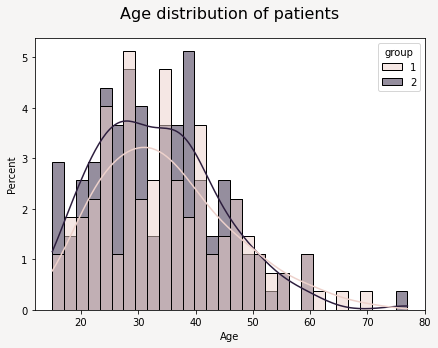

In [27]:
plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
ax = sns.histplot(data=ms_df, x=ms_df['Age'], hue='group', stat='percent', common_norm=True, bins=30,kde=True)
# ax.set_facecolor('#F6F5F4')
ax.set_title('Age distribution of patients', fontsize=16, y=1.05);

Text(0.5, 0, 'Schooling (years)')

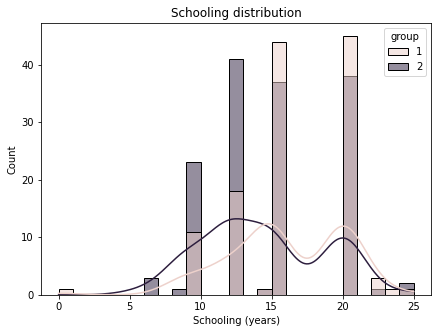

In [28]:
plt.figure(figsize = (7,5))
sns.histplot(data=ms_df, x='Schooling', hue='group', binwidth=1, kde=True)
plt.title('Schooling distribution')
plt.xlabel('Schooling (years)')

#### Analyzing Categorical Data

Text(0.5, 0, 'Initial_Symptom')

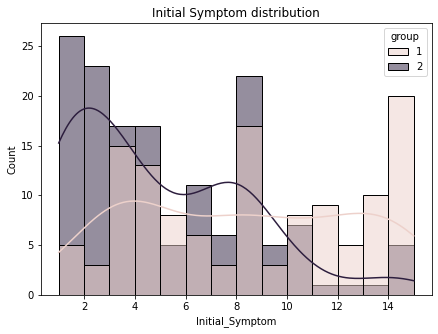

In [29]:
plt.figure(figsize = (7,5))
sns.histplot(data=ms_df, x='Initial_Symptom', hue='group', binwidth=1, kde=True)
plt.title('Initial Symptom distribution')
plt.xlabel('Initial_Symptom')

In [30]:
categorical_vars = ms_df.columns[2:-1]
categorical_vars

Index(['Schooling', 'Breastfeeding', 'Varicella', 'Initial_Symptom',
       'Mono_or_Polysymptomatic', 'Oligoclonal_Bands', 'LLSSEP', 'ULSSEP',
       'VEP', 'BAEP', 'Periventricular_MRI', 'Cortical_MRI',
       'Infratentorial_MRI', 'Spinal_Cord_MRI'],
      dtype='object')

In [31]:
for var in categorical_vars:
    print("Values distribution for ",var)

    print(ms_df[var].value_counts())
    print('*'*50)

Values distribution for  Schooling
20.0    83
15.0    81
12.0    59
9.0     34
22.0     4
6.0      3
25.0     2
14.0     2
0.0      1
23.0     1
24.0     1
8.0      1
Name: Schooling, dtype: int64
**************************************************
Values distribution for  Breastfeeding
1    131
3     85
2     57
Name: Breastfeeding, dtype: int64
**************************************************
Values distribution for  Varicella
1    124
2    104
3     45
Name: Varicella, dtype: int64
**************************************************
Values distribution for  Initial_Symptom
8.0     39
3.0     32
1.0     31
4.0     30
2.0     26
6.0     17
10.0    15
14.0    14
5.0     13
15.0    11
13.0    11
11.0    10
7.0      9
9.0      8
12.0     6
Name: Initial_Symptom, dtype: int64
**************************************************
Values distribution for  Mono_or_Polysymptomatic
2    186
1     81
3      6
Name: Mono_or_Polysymptomatic, dtype: int64
*********************************************

In [32]:
from IPython.display import display
for var in categorical_vars:
    df = ms_df.groupby([var])['group'].value_counts(normalize=True).mul(100).to_frame(name='Percent within group (%)').style.background_gradient(cmap='Blues')
    display(df)

In [33]:
ms_df.groupby(['Periventricular_MRI','Infratentorial_MRI','Cortical_MRI', 'Spinal_Cord_MRI'])['group']\
.value_counts(normalize=True).mul(100).to_frame(name='Percent within group (%)').style.background_gradient(cmap='coolwarm')

### Analyzing dataset dirtribution

In [34]:
ms_df['group'].value_counts()

2    148
1    125
Name: group, dtype: int64

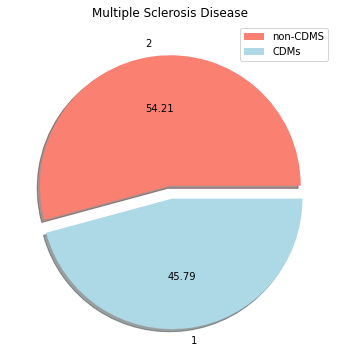

In [35]:
fig , ax= plt.subplots(figsize=(6,6))
group = ms_df.group.value_counts()
ax.pie(x = group.values ,
       labels = group.index ,
       shadow=True ,
       colors=["Salmon","lightblue"] ,
       explode = [0 , 0.1] ,
       autopct="%.2F" );
ax.set(title="Multiple Sclerosis Disease")
ax.legend(["non-CDMS","CDMs"]);

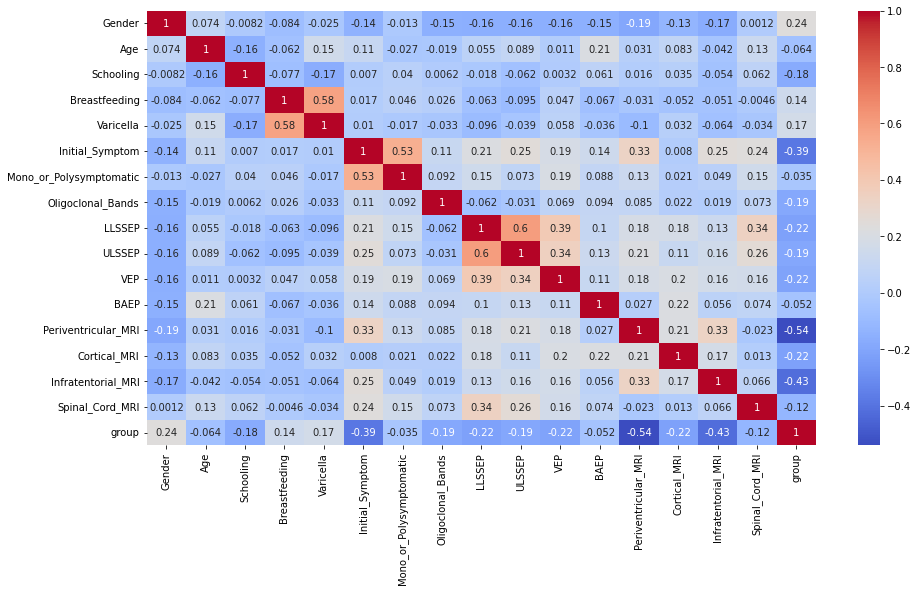

In [36]:
plt.figure(figsize =(15,8))
cmap = sns.color_palette('coolwarm', as_cmap=True)
sns.heatmap(ms_df_imputed.corr(),annot =True,cmap = cmap)
plt.show()

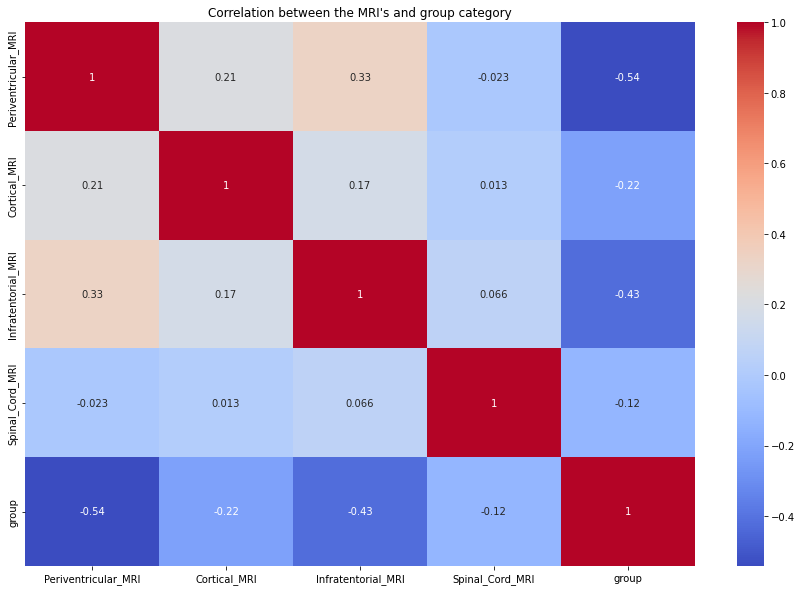

In [37]:
corr =ms_df.loc[:,['Periventricular_MRI','Cortical_MRI','Infratentorial_MRI','Spinal_Cord_MRI','group']].corr()
cmap = sns.color_palette('coolwarm', as_cmap=True)
plt.figure(figsize=(15,10))
sns.heatmap(data = corr,cmap=cmap, annot = True)
plt.title('Correlation between the MRI\'s and group category');

In [38]:
# PCA to explain 99% percantage of the variability in the data
pca_reducer = PCA(n_components=10)

brain_gene_pca_df = pd.DataFrame(pca_reducer.fit_transform(ms_df_imputed))

In [39]:
brain_gene_pca_df.iloc[:, :4].std(axis=0, ddof=0).to_numpy()

array([11.12818682,  4.25176031,  4.13469773,  1.0213962 ])

In [40]:
brain_gene_pca_df

,0,1,2,3,4,5,6,7,8,9
0,-0.590567,-0.313686,-6.528650,-1.081751,0.943127,0.579351,0.106036,0.028673,0.582721,0.325340
1,26.331608,9.235141,-7.433210,1.471289,0.304228,-0.011989,1.181530,0.450790,0.250462,0.348497
2,-12.524106,0.288654,-4.908736,0.672702,0.331363,-1.076133,0.440826,0.554443,-0.032331,0.528855
3,6.954184,0.446749,-0.061299,-1.166736,0.452259,-0.512019,0.295147,-0.288734,-0.664339,-0.204191
4,-0.419868,2.763218,-3.959066,-0.199917,-0.073346,0.013125,-0.214897,0.974673,-0.275554,-0.138084
...,...,...,...,...,...,...,...,...,...,...
268,-2.458902,-2.703312,7.359289,0.471916,-1.225185,0.094280,0.135110,1.127827,-0.526118,0.282550
269,-13.066406,-1.380356,0.352784,1.826441,-0.293083,-0.133305,0.860168,-0.510271,0.470660,0.091195
270,-14.473042,2.851303,7.906941,1.625950,-0.116238,1.577038,0.274701,-0.389779,0.321397,-0.404201
271,-1.635218,6.437415,5.842401,1.614430,0.587590,0.165012,-0.047127,-0.685434,-0.315739,-0.405248


Text(0, 0.5, 'Variances')

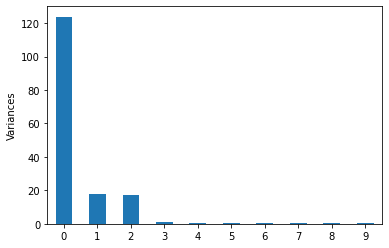

In [41]:
brain_gene_pca_df.iloc[:, :31].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

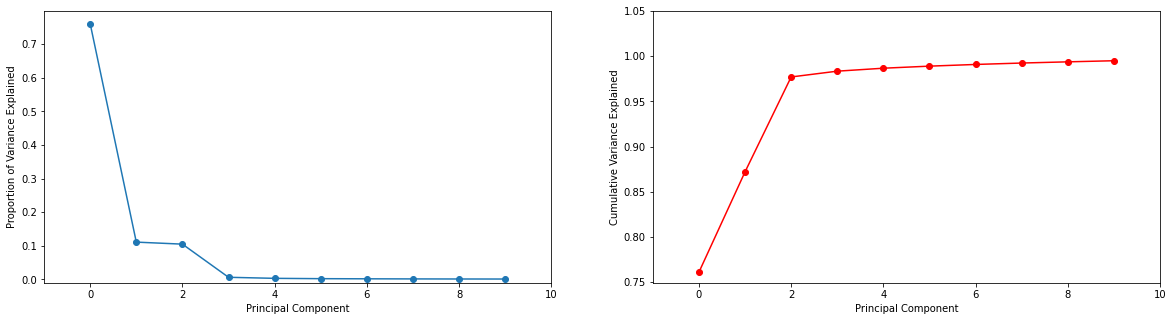

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sns.set_palette("coolwarm")
# Left plot
ax1.plot(pca_reducer.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca_reducer.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1, 10)

7. Initial_Symptoms: 1=visual, 2=sensory, 3=motor, 4=other, 5= visual and sensory,
6=visual and motor, 7=visual and others, 8=sensory and motor, 9=sensory and other,
10=motor and other, 11=Visual, sensory and motor, 12=visual, sensory and other,
13=Visual, motor and other, 14=Sensory, motor and other, 15=visual,sensory,motor
and other
8. **Mono _or_Polysymptomatic**: 1=monosymptomatic, 2=polysymptomatic, 3=unknown
9. Oligoclonal_Bands: 0=negative, 1=positive, 2=unknown
10. Lower-Limb Somatosensory Evoked Potentials (LLSSEP): 0=negative, 1=positive
11. Upper-Limb Somatosensory Evoked Potentials (ULSEP):0=negative, 1=positive
12. Visual Evoked Potentials (VEP):0=negative, 1=positive
13. Brainstem Auditory Evoked Potentials (BAEP): 0=negative, 1=positive
14. Periventricular_MRI:0=negative, 1=positive
15. Cortical_MRI: 0=negative, 1=positive
16. Infratentorial_MRI:0=negative, 1=positive
17. Spinal_Cord_MRI: 0=negative, 1=positive

In [43]:
gender = {1:'Male', 2: 'Female'}
breastfeeding = {1: 'yes', 2:'no', 3:'unknown'}
varicella = {1 : 'positive', 2: 'negative', 3: 'unknown'}
mono_polysymptomatic = {1:'monosymptomatic', 2:'polysymptomatic', 3:'unknown'}
oligoclonal_bands = {0: 'negative', 1:'positive' , 2:'unkown'}
llssep = {0:'negative',1:'positive'}
ulssep = {0:'negative',1:'positive'}
vep = {0:'negative',1:'positive'}
baep = {0:'negative',1:'positive'}
per_mri = {0:'negative',1:'positive'}
cor_mri = {0:'negative',1:'positive'}
infra_mri = {0:'negative',1:'positive'}
spinal_mri = {0:'negative',1:'positive'}
group = {1: 'CDMS' , 2: 'Non-CDMS' }

In [44]:
ms_df.columns

Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'group'],
      dtype='object')

In [45]:
ms_df['Gender'] = ms_df['Gender'].map(gender)
ms_df['Breastfeeding'] = ms_df['Breastfeeding'].map(breastfeeding)
ms_df['Varicella'] = ms_df['Varicella'].map(varicella)
ms_df['Mono_or_Polysymptomatic'] = ms_df['Mono_or_Polysymptomatic'].map(mono_polysymptomatic)
ms_df['Oligoclonal_Bands'] = ms_df['Oligoclonal_Bands'].map(oligoclonal_bands)
ms_df['LLSSEP'] = ms_df['LLSSEP'].map(llssep)
ms_df['ULSSEP'] = ms_df['ULSSEP'].map(ulssep)
ms_df['VEP'] = ms_df['VEP'].map(vep)
ms_df['BAEP'] = ms_df['BAEP'].map(baep)
ms_df['Periventricular_MRI'] = ms_df['Periventricular_MRI'].map(per_mri)
ms_df['Cortical_MRI'] = ms_df['Cortical_MRI'].map(cor_mri)
ms_df['Infratentorial_MRI'] = ms_df['Infratentorial_MRI'].map(infra_mri)
ms_df['Spinal_Cord_MRI'] = ms_df['Spinal_Cord_MRI'].map(spinal_mri)
ms_df['group'] = ms_df['group'].map(group)


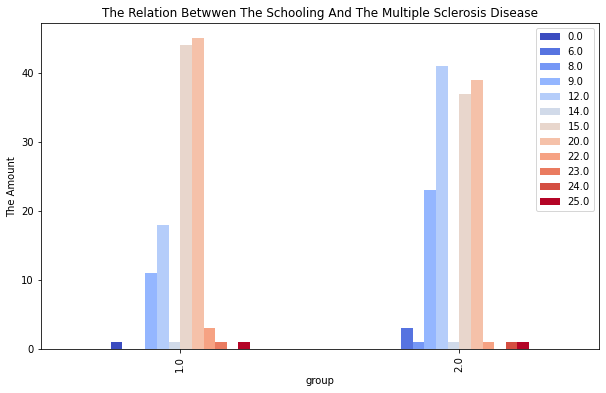

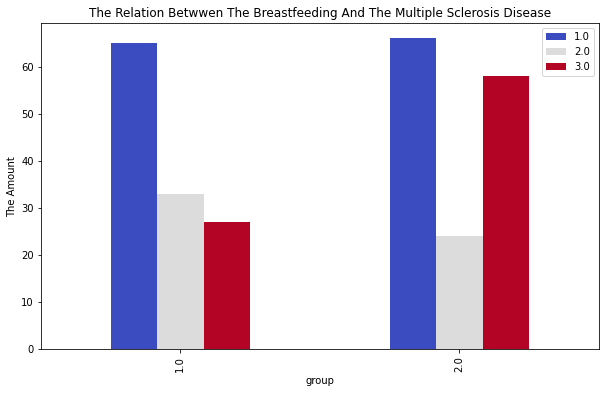

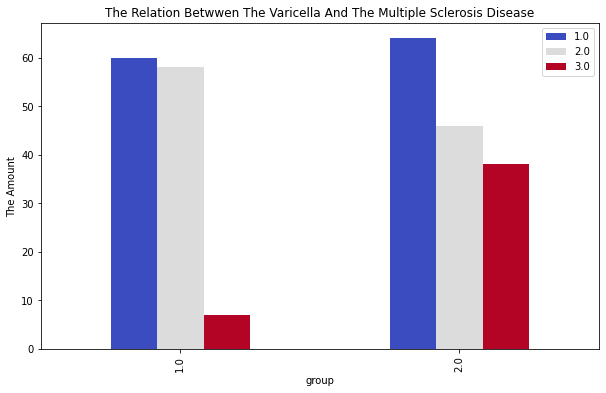

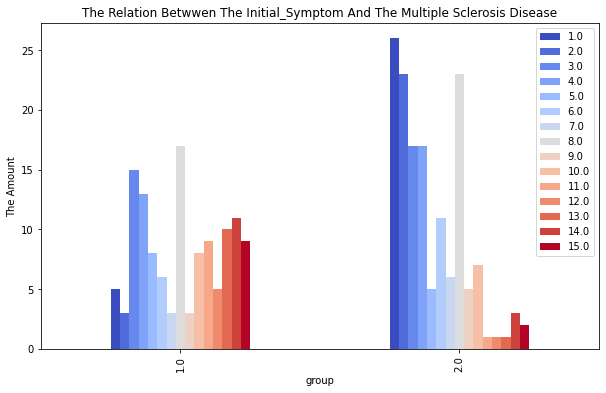

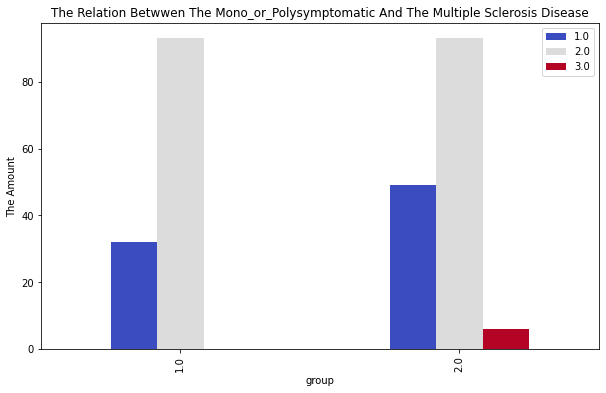

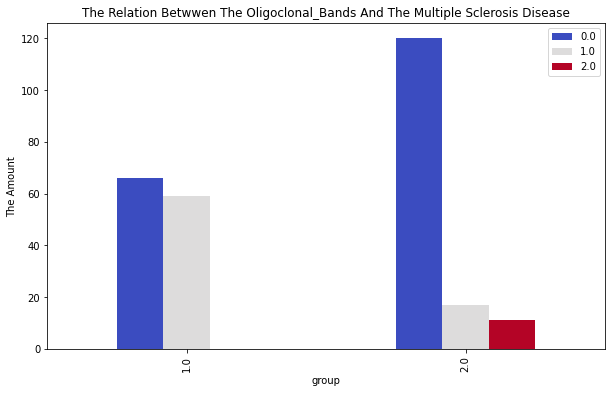

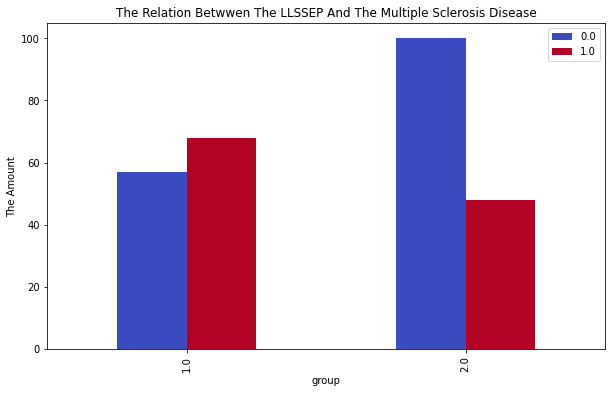

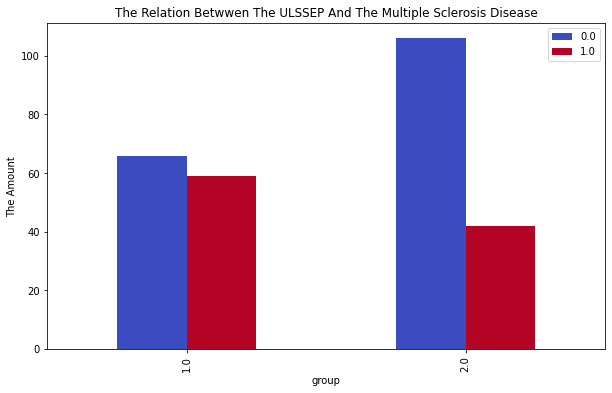

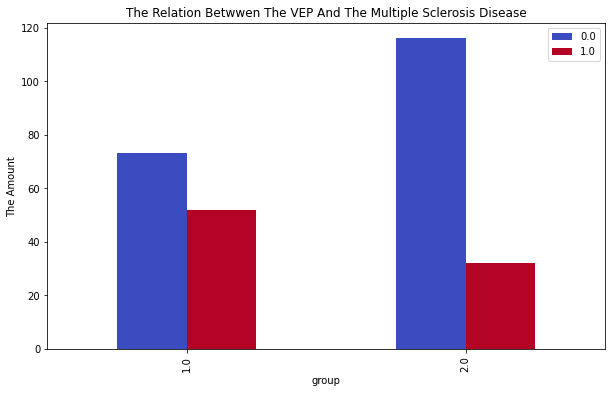

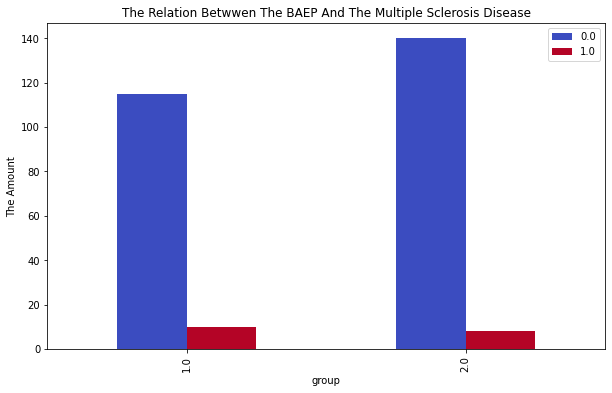

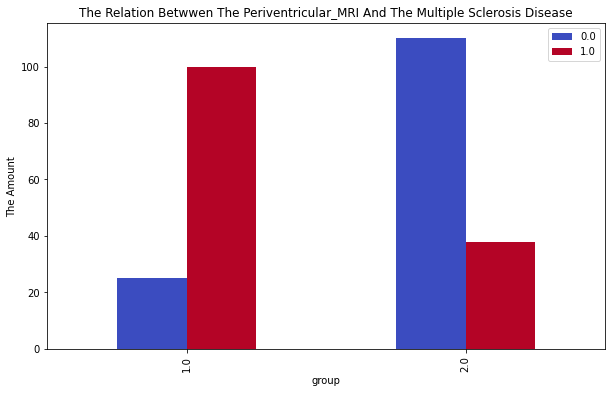

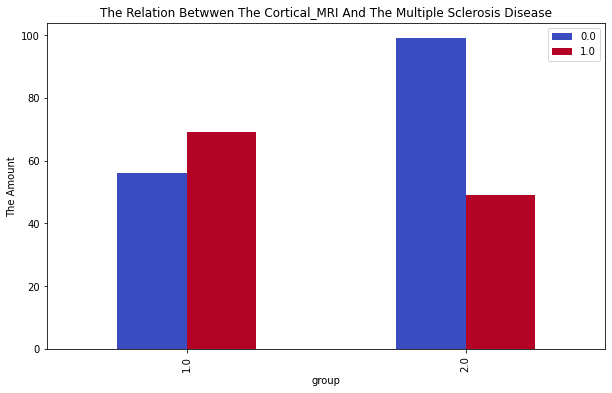

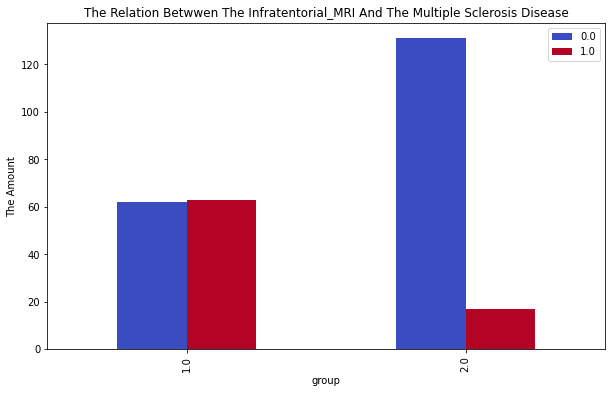

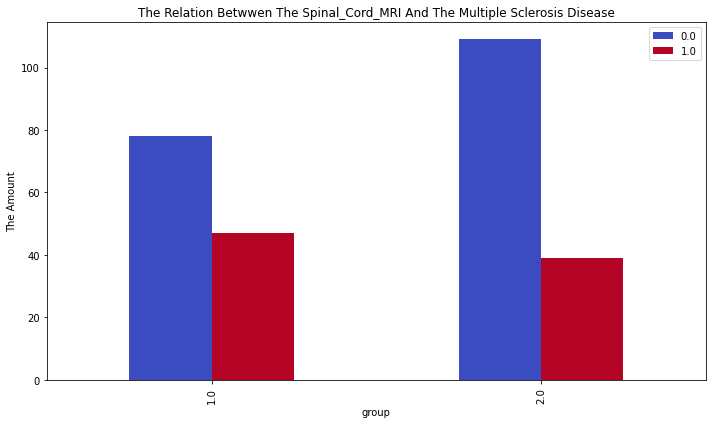

In [46]:

for i,var in enumerate(categorical_vars):
    cat= pd.crosstab(ms_df_imputed["group"], ms_df_imputed[var])
    # plt.subplot(5, 4, i+1)
    cat.plot(kind="bar" ,
            figsize=(10,6),
            title=f"The Relation Betwwen The {var} And The Multiple Sclerosis Disease",
            cmap = 'coolwarm'
            );
    plt.ylabel("The Amount")
    plt.legend()
plt.tight_layout()
plt.show()

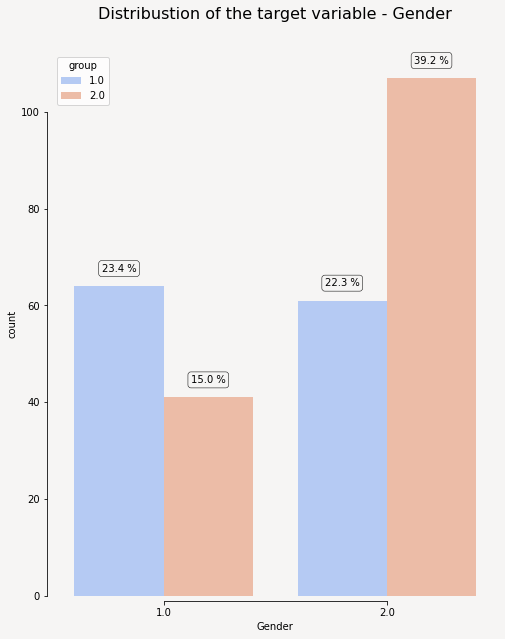

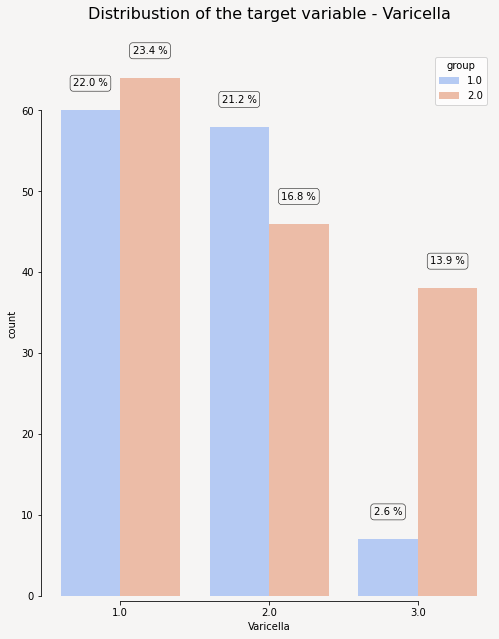

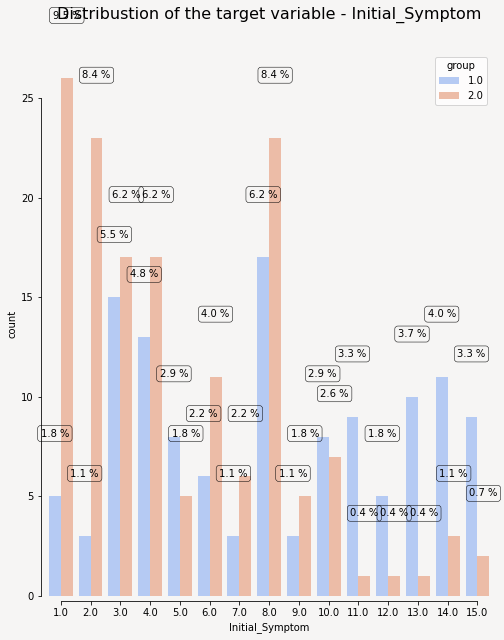

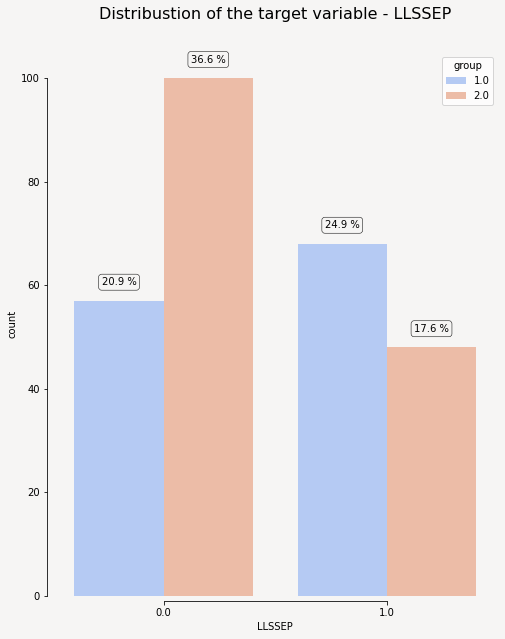

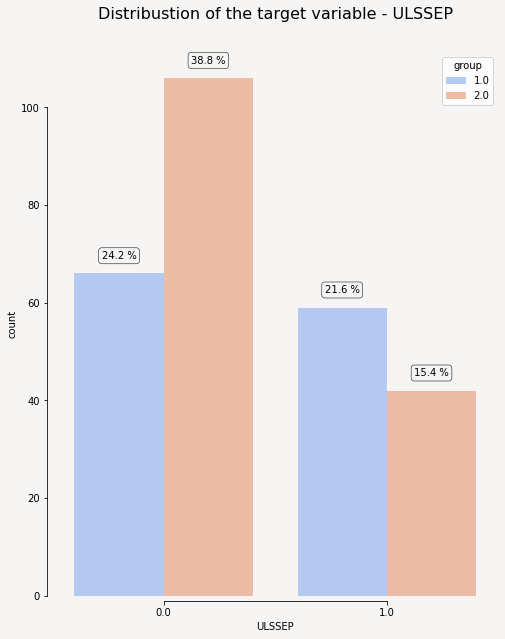

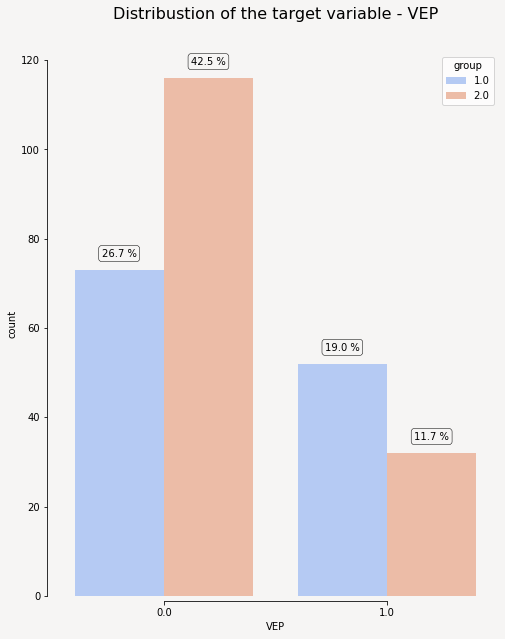

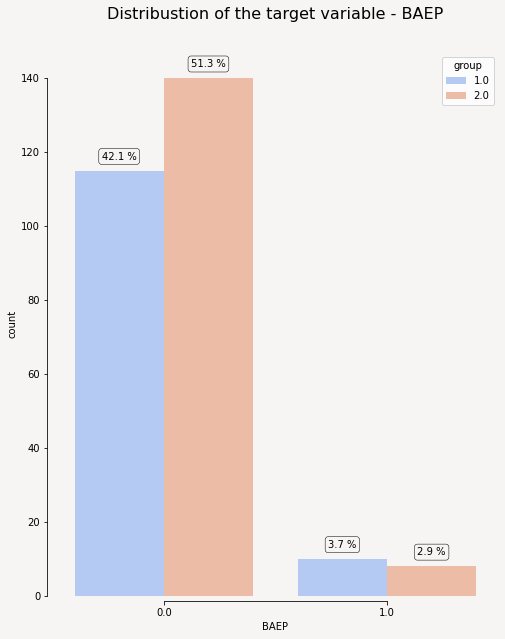

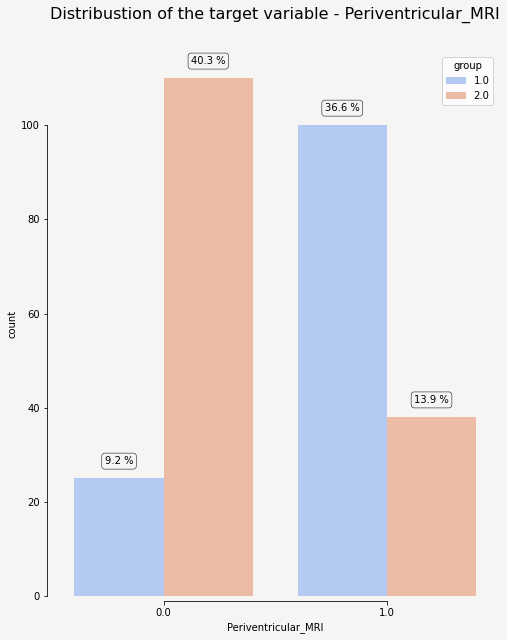

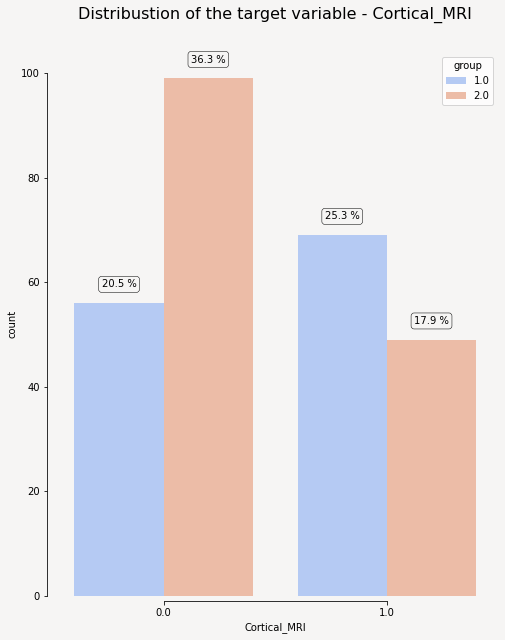

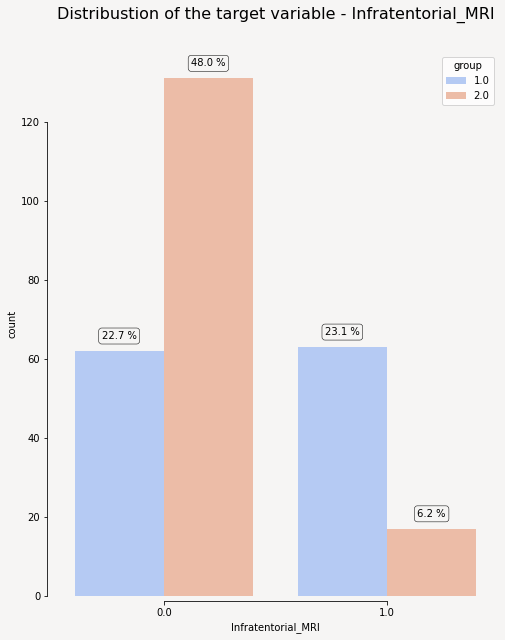

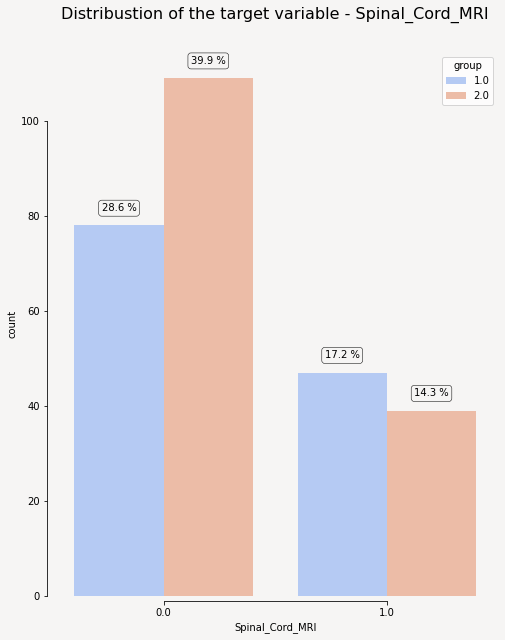

In [47]:
col = ['Gender', 'Varicella', 'Initial_Symptom', 'LLSSEP','ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI', 'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI']
for i in col:
    # count_plot(ms_df, i, 'Distribustion of the target variable - '+i, hue=0)
    count_plot(ms_df_imputed, i, 'Distribustion of the target variable - '+i, hue=1)

### Experimentary Data Analysis

In [48]:

from sklearn.model_selection import cross_val_score , train_test_split ,RandomizedSearchCV , GridSearchCV 
from sklearn.metrics import accuracy_score , classification_report , f1_score , precision_score , recall_score , roc_curve
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import warnings

In [49]:
df_test = pd.read_csv(
    "data\conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")

In [50]:
df_test.drop('Unnamed: 0',axis=1,inplace=True)

In [51]:
Missing_value_Median= ["Schooling","Initial_Symptom"]
Missing_value_Frequency =["Final_EDSS","Initial_EDSS"]
imputer_median = SimpleImputer(strategy="median")
imputer_frequency = SimpleImputer(strategy="most_frequent")
imputer = ColumnTransformer([("imputer_median", imputer_median , Missing_value_Median),
                            ("imputer_frequency", imputer_frequency , Missing_value_Frequency)], remainder="passthrough")

In [52]:
df_imputed = imputer.fit_transform(df_test)

In [53]:
df.columns

Index(['Percent within group (%)'], dtype='object')

In [54]:
df_imputed = pd.DataFrame(data=df_imputed , columns=['Schooling','Initial_Symptom','Final_EDSS','Initial_EDSS','Gender', 
                                                     'Age',  'Breastfeeding', 'Varicella',
                                                        'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
                                                       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
                                                       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 
                                                       'group'])
df_imputed

,Schooling,Initial_Symptom,Final_EDSS,Initial_EDSS,Gender,Age,Breastfeeding,Varicella,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,20.0,2.0,1.0,1.0,1.0,34.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,25.0,10.0,2.0,2.0,1.0,61.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,20.0,3.0,1.0,1.0,1.0,22.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,15.0,7.0,1.0,1.0,2.0,41.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,20.0,6.0,1.0,1.0,2.0,34.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,8.0,9.0,1.0,1.0,2.0,31.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
269,15.0,5.0,1.0,1.0,1.0,21.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
270,12.0,13.0,1.0,1.0,2.0,19.0,3.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
271,15.0,15.0,1.0,1.0,2.0,32.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0


In [55]:
df_imputed.isna().sum()

Schooling                  0
Initial_Symptom            0
Final_EDSS                 0
Initial_EDSS               0
Gender                     0
Age                        0
Breastfeeding              0
Varicella                  0
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
group                      0
dtype: int64

In [56]:
df_imputed.isnull().sum()

Schooling                  0
Initial_Symptom            0
Final_EDSS                 0
Initial_EDSS               0
Gender                     0
Age                        0
Breastfeeding              0
Varicella                  0
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
group                      0
dtype: int64

In [57]:
# Outliers z_score
outliers = []
for i in df_imputed.columns:
    thres = 3
    mean = np.mean(df_imputed[i])
    std = np.std(df_imputed[i])
    for x in df_imputed[i]:
        z_score = (x-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(x)
    print(i)
    print(outliers)
    outliers.clear()

Schooling
[0.0]
Initial_Symptom
[]
Final_EDSS
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
Initial_EDSS
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
Gender
[]
Age
[70.0, 77.0]
Breastfeeding
[]
Varicella
[]
Mono_or_Polysymptomatic
[]
Oligoclonal_Bands
[]
LLSSEP
[]
ULSSEP
[]
VEP
[]
BAEP
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Periventricular_MRI
[]
Cortical_MRI
[]
Infratentorial_MRI
[]
Spinal_Cord_MRI
[]
group
[]


In [58]:
# Outliers IQR
outliers = []
for i in df_imputed.columns:
    data = sorted(df_imputed[i])
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for x in df_imputed[i]: 
        if (x<lwr_bound or x>upr_bound):
            outliers.append(x)
    print(i)
    print(outliers)
    outliers.clear()

Schooling
[]
Initial_Symptom
[]
Final_EDSS
[2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]
Initial_EDSS
[2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
Gender
[]
Age
[65.0, 70.0, 77.0]
Breastfeeding
[]
Varicella
[]
Mono_or_Polysymptomatic
[]
Oligoclonal_Bands
[]
LLSSEP
[]
ULSSEP
[]
VEP
[]
BAEP
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Periventricular_MRI
[]
Cortical_MRI
[]
Infratentorial_MRI
[]
Spinal_Cord_MRI
[]
group
[]


In [59]:
# Outliers IQR
outliers = []
for i in df_imputed.columns:
    median = np.median(df_imputed[i])
    data = sorted(df_imputed[i])
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for x in df_imputed[i]: 
        if (x<lwr_bound or x>upr_bound):
            outliers.append(x)
            df_imputed[i].replace([x],[median] , inplace=True)